In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os.path as osp

In [3]:
data = pd.read_csv(osp.join('.', 'Data', 'StudentPerformanceFactors.csv'))
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Kiểm tra sơ bộ bộ dữ liệu và thống kê mô tả

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Kiểm tra trùng lặp

In [5]:
print("Duplicated entries:", data.duplicated().sum())

Duplicated entries: 0


Kiểm tra dữ liệu bị thiếu

In [6]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

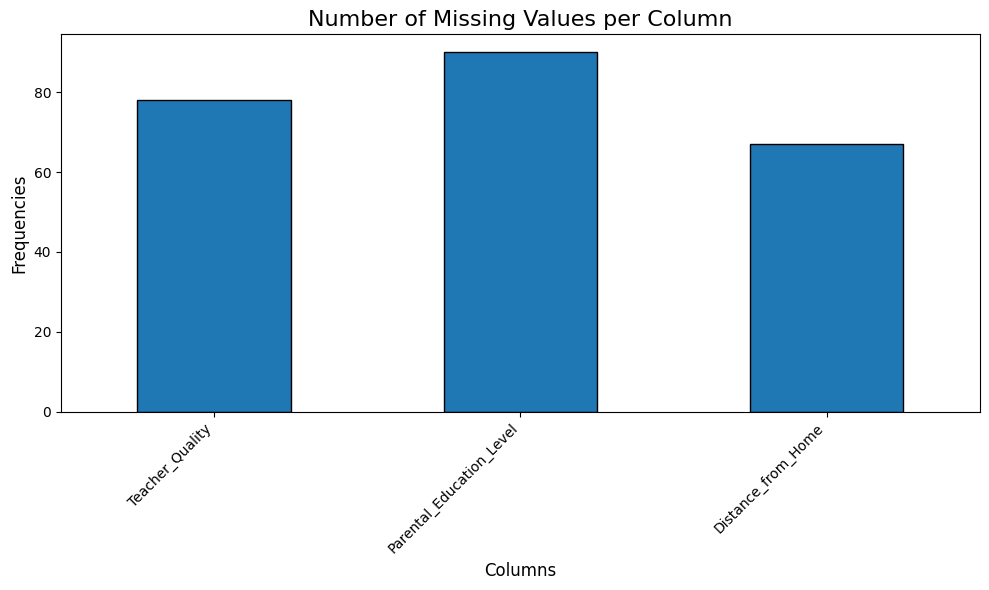

In [7]:
plt.figure(figsize=(10, 6))

missing_values.plot(kind='bar', edgecolor='black')

plt.title('Number of Missing Values per Column', fontsize=16)

plt.xlabel('Columns', fontsize=12)
plt.ylabel('Frequencies', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

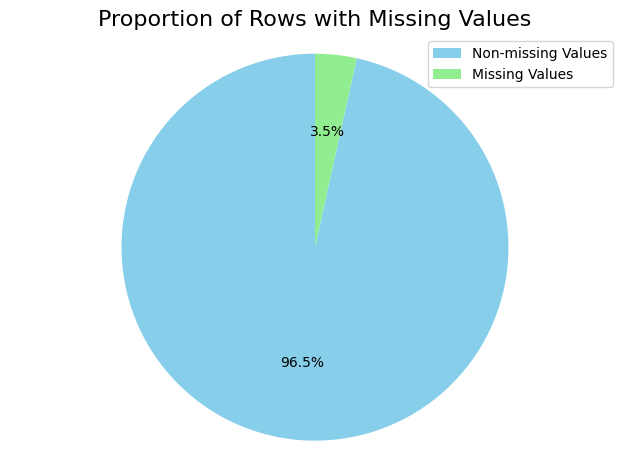

In [8]:
total_missing = data.isnull().any(axis=1).sum() / data.shape[0]
non_missing = 1 - total_missing

labels = ['Non-missing Values', 'Missing Values']
sizes = [non_missing, total_missing]
colors = ['skyblue', 'lightgreen']

patches, _, _2 = plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Proportion of Rows with Missing Values', fontsize=16)
plt.legend(patches, labels, loc='upper right')

plt.axis('equal')
plt.tight_layout()

plt.show()

## Xử lí dữ liệu bị thiếu

In [9]:
students = data.dropna(subset = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'])
students.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# Kiểm tra phân phối và xử lí outliners

In [10]:
students.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


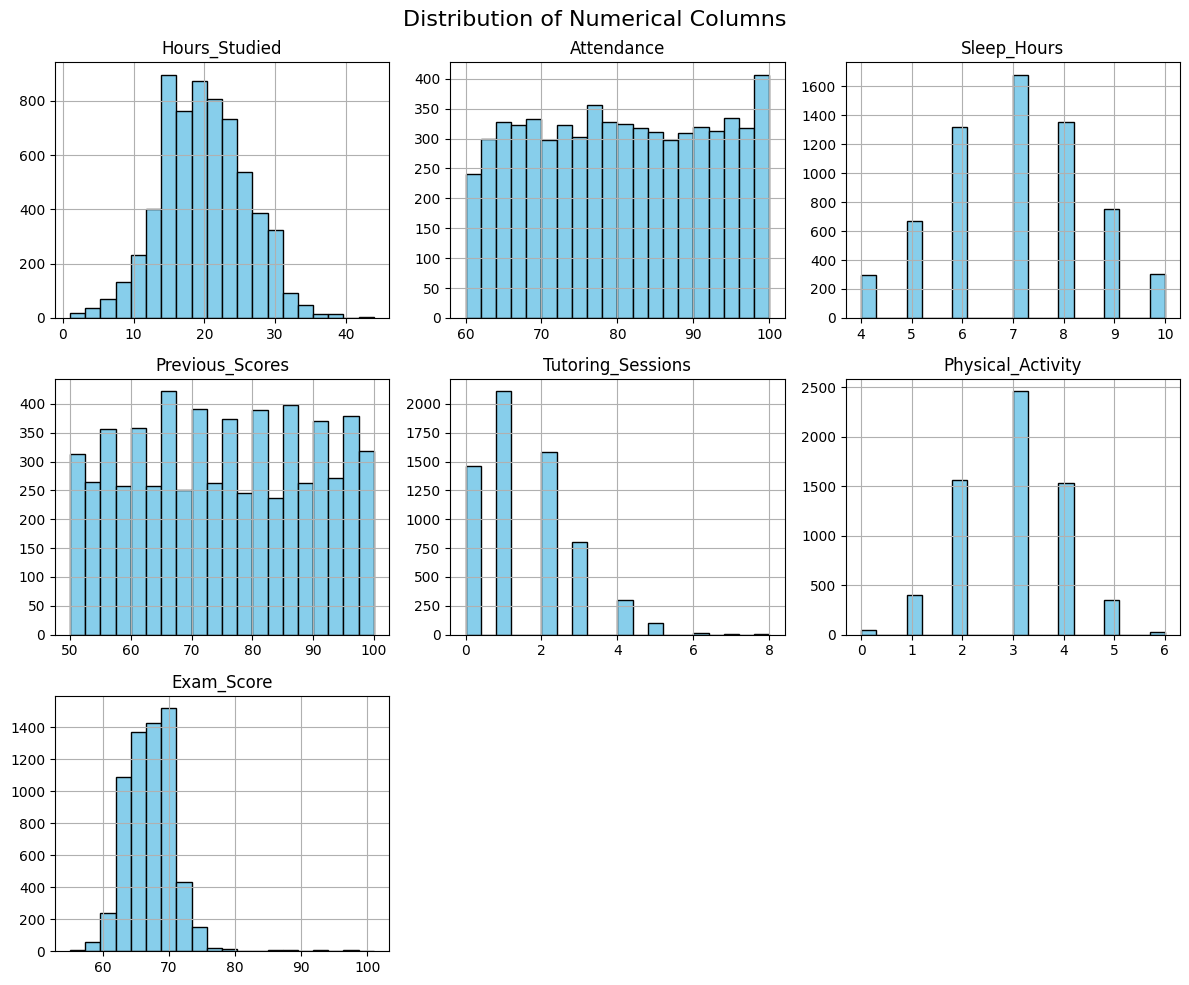

In [11]:
students.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()

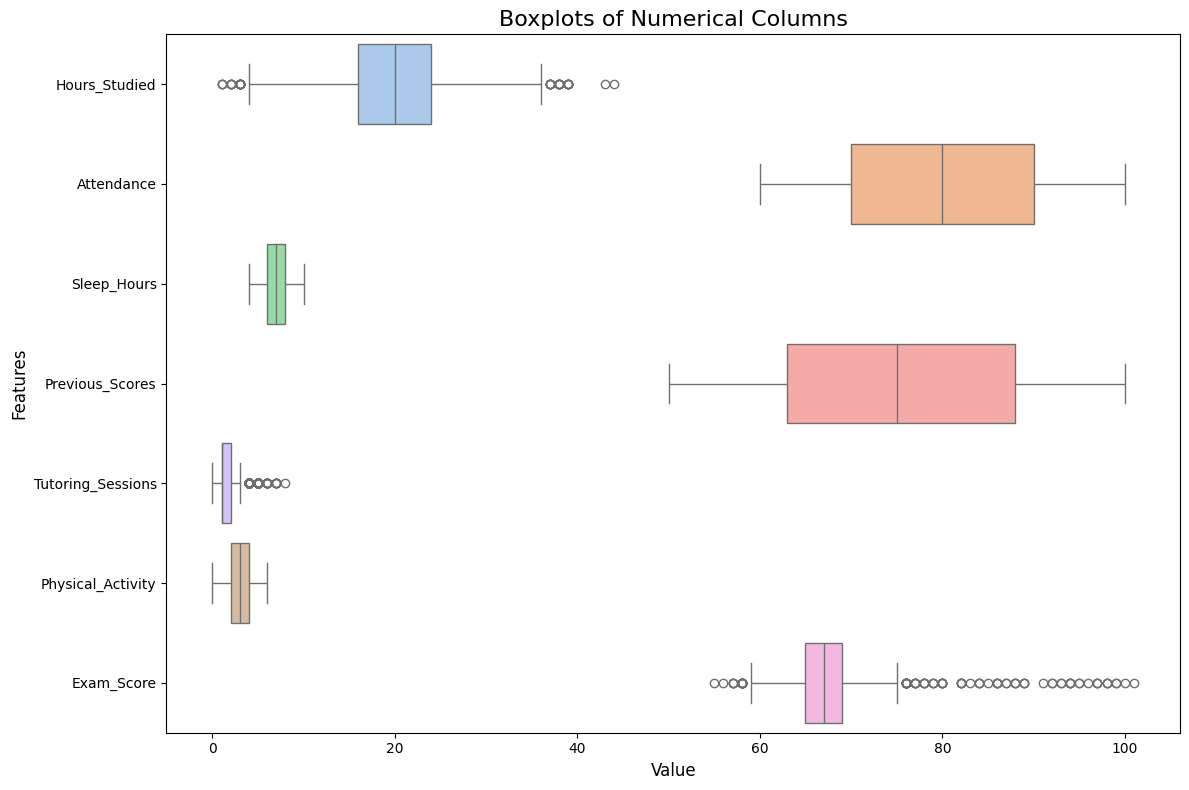

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(students, orient='h', palette='pastel')
plt.title('Boxplots of Numerical Columns', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
outliers_df = pd.DataFrame()

for col in students.select_dtypes(['float64', 'int64']):
    Q1 = students[col].quantile(0.25)
    Q3 = students[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = students[(students[col] < lower_bound) | (students[col] > upper_bound)]

    outliers_df = pd.concat([outliers_df, col_outliers])

    print(f"Column: {col}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"  Outliers Found: {len(col_outliers)}")

Column: Hours_Studied
  Lower Bound: 4.0, Upper Bound: 36.0
  Outliers Found: 40
Column: Attendance
  Lower Bound: 40.0, Upper Bound: 120.0
  Outliers Found: 0
Column: Sleep_Hours
  Lower Bound: 3.0, Upper Bound: 11.0
  Outliers Found: 0
Column: Previous_Scores
  Lower Bound: 25.5, Upper Bound: 125.5
  Outliers Found: 0
Column: Tutoring_Sessions
  Lower Bound: -0.5, Upper Bound: 3.5
  Outliers Found: 423
Column: Physical_Activity
  Lower Bound: -1.0, Upper Bound: 7.0
  Outliers Found: 0
Column: Exam_Score
  Lower Bound: 59.0, Upper Bound: 75.0
  Outliers Found: 103


# Kiểm tra kết quả cuối cùng

In [14]:
data_cleaned = students.drop(outliers_df.index, axis=0)
data_cleaned.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000
mean,20.008053,80.021933,7.041295,75.107779,1.291809,2.967443,66.988348
std,5.782292,11.499526,1.469662,14.348109,0.982455,1.026956,3.230139
min,4.000000,60.000000,4.000000,50.000000,0.000000,0.000000,59.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,87.000000,2.000000,4.000000,69.000000
max,36.000000,100.000000,10.000000,100.000000,3.000000,6.000000,75.000000


In [15]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5836 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               5836 non-null   int64 
 1   Attendance                  5836 non-null   int64 
 2   Parental_Involvement        5836 non-null   object
 3   Access_to_Resources         5836 non-null   object
 4   Extracurricular_Activities  5836 non-null   object
 5   Sleep_Hours                 5836 non-null   int64 
 6   Previous_Scores             5836 non-null   int64 
 7   Motivation_Level            5836 non-null   object
 8   Internet_Access             5836 non-null   object
 9   Tutoring_Sessions           5836 non-null   int64 
 10  Family_Income               5836 non-null   object
 11  Teacher_Quality             5836 non-null   object
 12  School_Type                 5836 non-null   object
 13  Peer_Influence              5836 non-null   object
 1

In [16]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 209 to 6566
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               566 non-null    int64 
 1   Attendance                  566 non-null    int64 
 2   Parental_Involvement        566 non-null    object
 3   Access_to_Resources         566 non-null    object
 4   Extracurricular_Activities  566 non-null    object
 5   Sleep_Hours                 566 non-null    int64 
 6   Previous_Scores             566 non-null    int64 
 7   Motivation_Level            566 non-null    object
 8   Internet_Access             566 non-null    object
 9   Tutoring_Sessions           566 non-null    int64 
 10  Family_Income               566 non-null    object
 11  Teacher_Quality             566 non-null    object
 12  School_Type                 566 non-null    object
 13  Peer_Influence              566 non-null    object
 

# Lưu file đã xử lý

In [17]:
data_cleaned.to_csv(osp.join('.', 'Data', 'preprocessed.csv'), index=False)